Mean Absolute Error: 10.199916727819806
Mean Squared Error: 157.3661133462318
R² Score: 0.07575469523480727


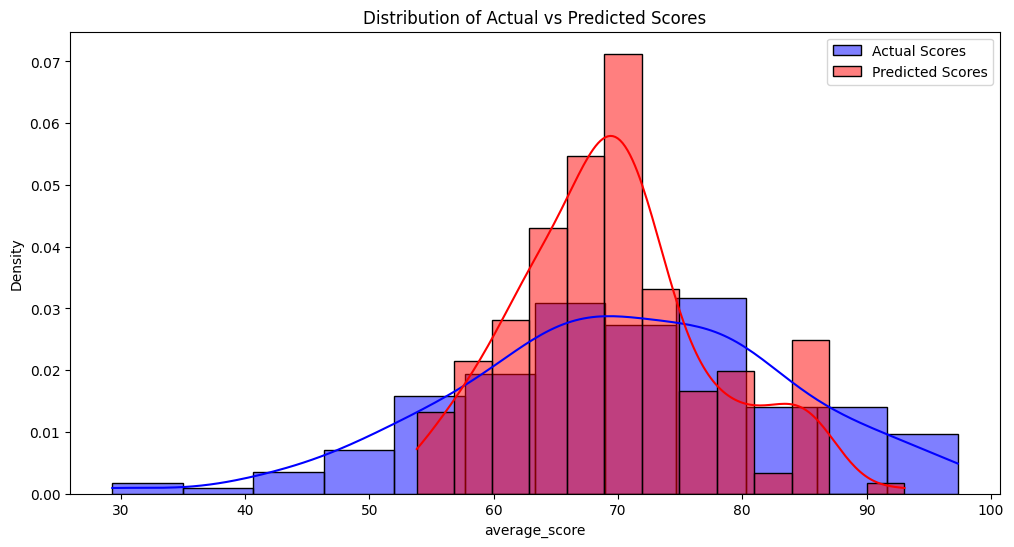

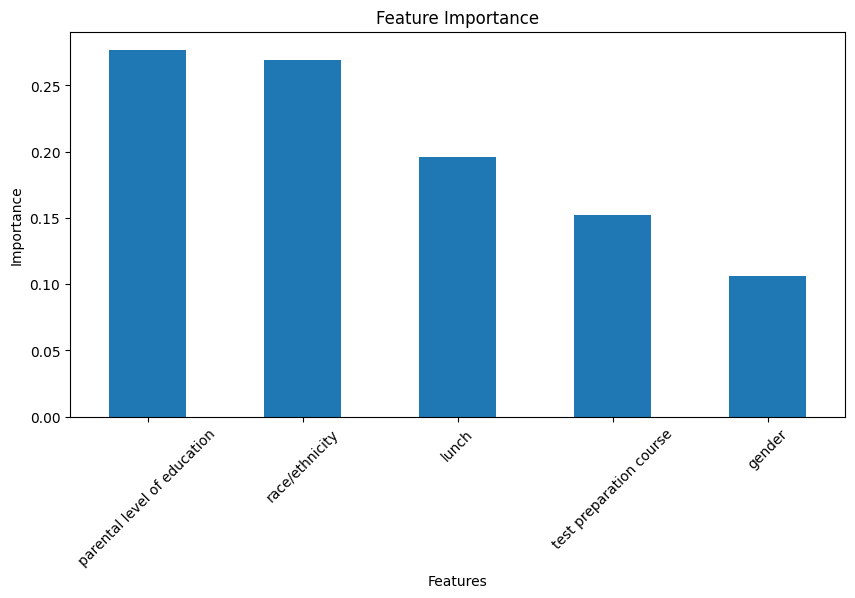

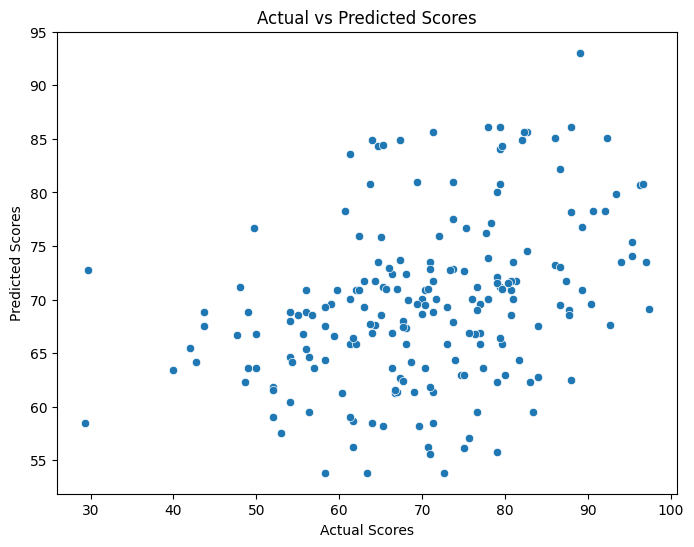

Predicted Average Score: 74.16739316239317


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load dataset
df = pd.read_csv("exams.csv")

# Feature Engineering
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Encoding categorical variables
encoder = LabelEncoder()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Selecting features and target
X = df.drop(columns=['math score', 'reading score', 'writing score', 'average_score'])
y = df['average_score']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model and scaler
joblib.dump(model, 'student_performance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization of Results
plt.figure(figsize=(12, 6))
sns.histplot(y_test, color='blue', label='Actual Scores', kde=True, stat='density')
sns.histplot(y_pred, color='red', label='Predicted Scores', kde=True, stat='density')
plt.title('Distribution of Actual vs Predicted Scores')
plt.legend()
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot for Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

# Function for New Predictions
def predict_performance(new_data):
    """Predict student performance based on input data."""
    model = joblib.load('student_performance_model.pkl')
    scaler = joblib.load('scaler.pkl')
    new_data = pd.DataFrame([new_data])
    new_data[categorical_columns] = new_data[categorical_columns].apply(encoder.fit_transform)
    new_data = scaler.transform(new_data)
    return model.predict(new_data)[0]

# Example Usage
example_student = {'gender': 'female', 'race/ethnicity': 'group D', 'parental level of education': 'some college', 'lunch': 'standard', 'test preparation course': 'completed'}
predicted_score = predict_performance(example_student)
print(f"Predicted Average Score: {predicted_score}")
